In [ ]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
(X_train,_),(_,_)=mnist.load_data()

In [ ]:
print(X_train.shape)

(60000, 28, 28)


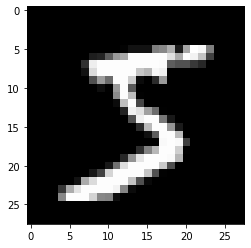

In [ ]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

Normalize the data in range [-1,1]

In [ ]:
X_train=(X_train.astype('float')-127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [ ]:
TOTAL_EPOCHS=50
BATCH_SIZE=256
NO_OF_BATCHES=int(X_train.shape[0]/BATCH_SIZE)
HALF_BATCH=128
NOISE_DIM=100 #upscale into 784 Dim Vector
adam=Adam(lr=2e-4,beta_1=0.5)

Generator
*   Input-> noise( 100 dim )
*   Output-> Vector( 784 dim )


In [ ]:
generator=Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 784)              

In [ ]:
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


**GAN**

In [ ]:
discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generated_img=generator(gan_input) 
gan_output=discriminator(generated_img)

Functional API

In [ ]:
model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [ ]:
X_train=X_train.reshape(-1,784)
print(X_train.shape)

(60000, 784)


In [ ]:
def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

In [ ]:
X_train=X_train.reshape(-1,784)

In [ ]:
!mkdir -p images
def save_imgs(epoch,samples=100):
  noise=np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_imgs=generator.predict(noise)
  generated_imgs=generated_imgs.reshape(samples,28,28)
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')

  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
  plt.show()

Epoch 1 D loss: 0.6690 G loss: 0.9526
Epoch 2 D loss: 0.6463 G loss: 0.9987
Epoch 3 D loss: 0.6475 G loss: 1.0469
Epoch 4 D loss: 0.6376 G loss: 1.0935
Epoch 5 D loss: 0.6026 G loss: 1.2075


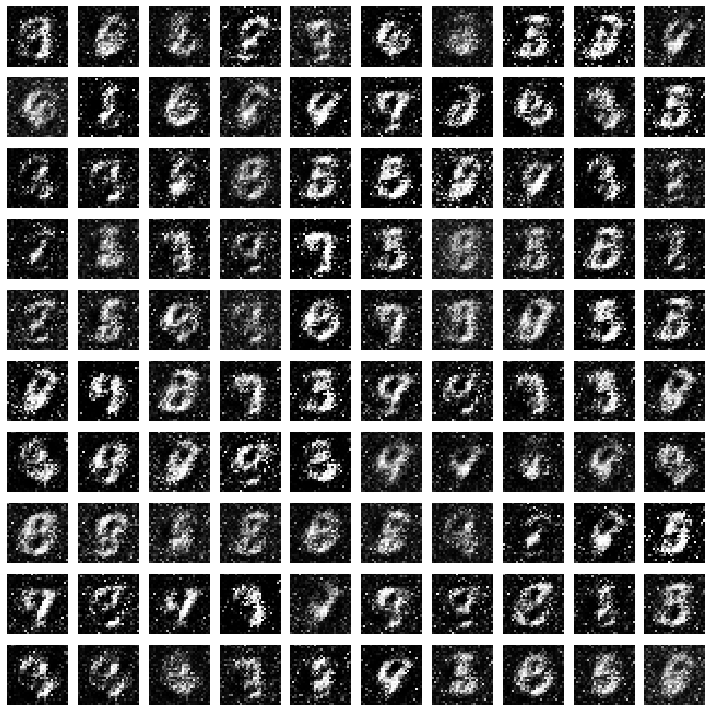

Epoch 6 D loss: 0.5898 G loss: 1.2442
Epoch 7 D loss: 0.5539 G loss: 1.3757
Epoch 8 D loss: 0.5368 G loss: 1.4419
Epoch 9 D loss: 0.5496 G loss: 1.3592
Epoch 10 D loss: 0.5821 G loss: 1.2471


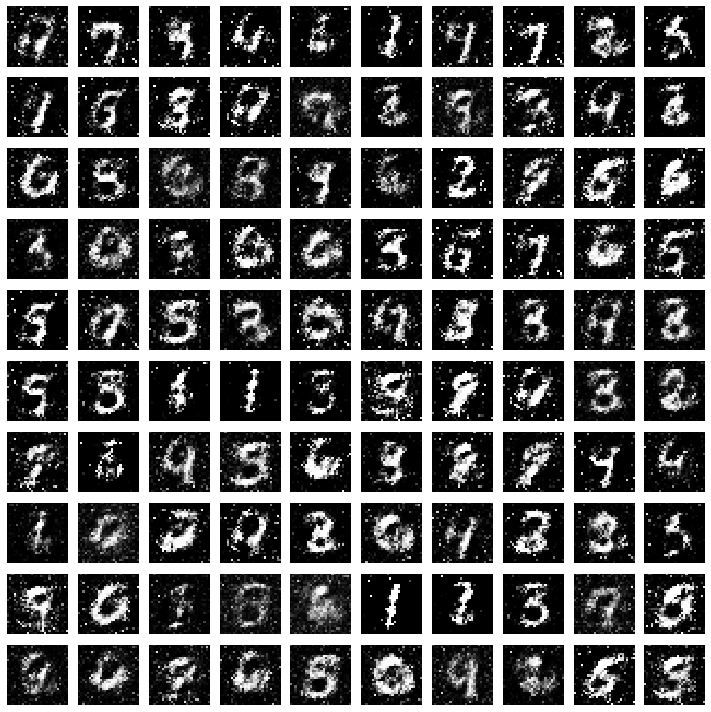

Epoch 11 D loss: 0.6015 G loss: 1.1759
Epoch 12 D loss: 0.6060 G loss: 1.1585
Epoch 13 D loss: 0.6133 G loss: 1.1322
Epoch 14 D loss: 0.6220 G loss: 1.0947
Epoch 15 D loss: 0.6206 G loss: 1.0860


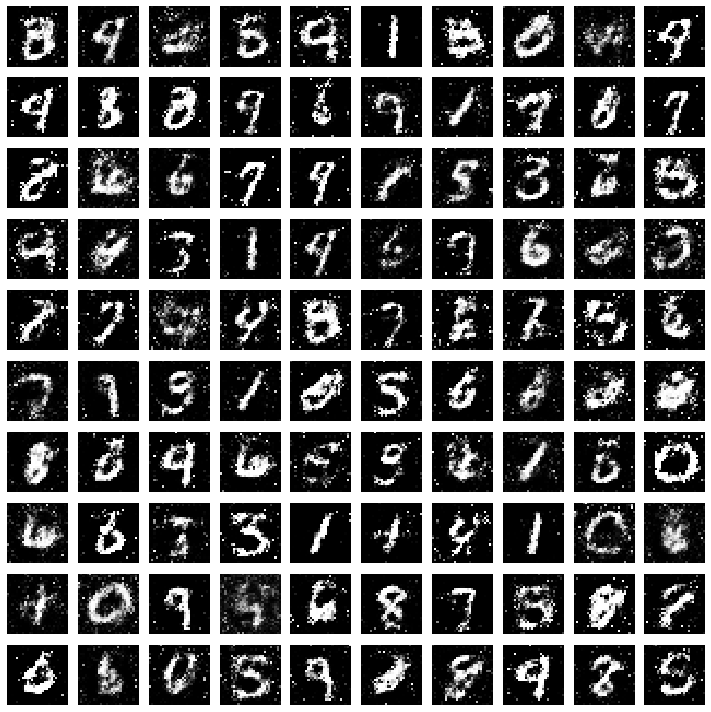

Epoch 16 D loss: 0.6223 G loss: 1.0998
Epoch 17 D loss: 0.6282 G loss: 1.0707
Epoch 18 D loss: 0.6349 G loss: 1.0672
Epoch 19 D loss: 0.6413 G loss: 1.0560
Epoch 20 D loss: 0.6404 G loss: 1.0431


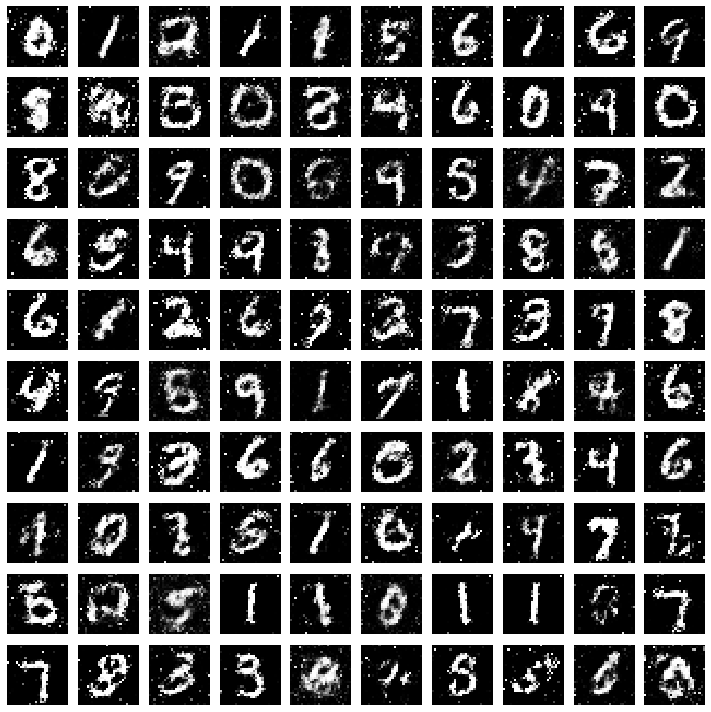

Epoch 21 D loss: 0.6425 G loss: 1.0507
Epoch 22 D loss: 0.6458 G loss: 1.0379
Epoch 23 D loss: 0.6460 G loss: 1.0396
Epoch 24 D loss: 0.6449 G loss: 1.0348
Epoch 25 D loss: 0.6515 G loss: 1.0262


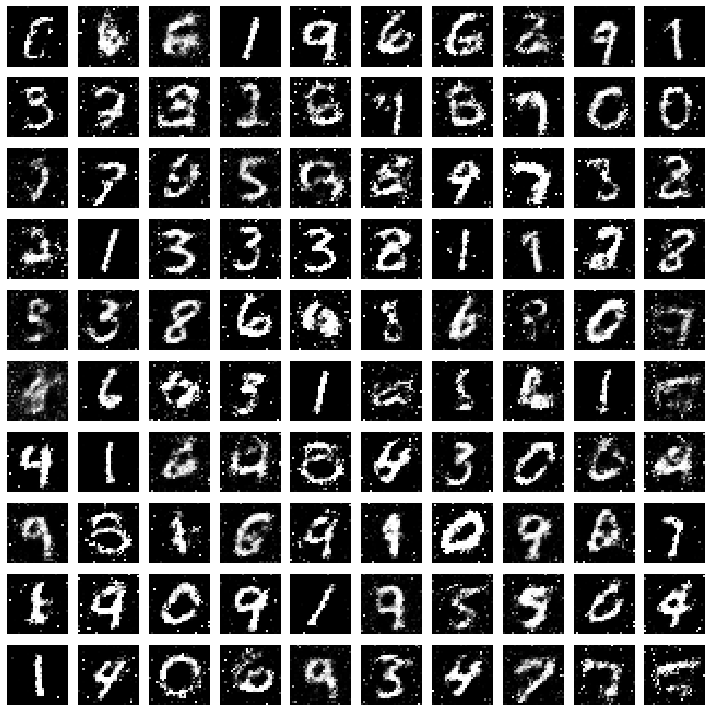

Epoch 26 D loss: 0.6507 G loss: 1.0238
Epoch 27 D loss: 0.6519 G loss: 1.0227
Epoch 28 D loss: 0.6530 G loss: 1.0319
Epoch 29 D loss: 0.6536 G loss: 1.0149
Epoch 30 D loss: 0.6532 G loss: 1.0234


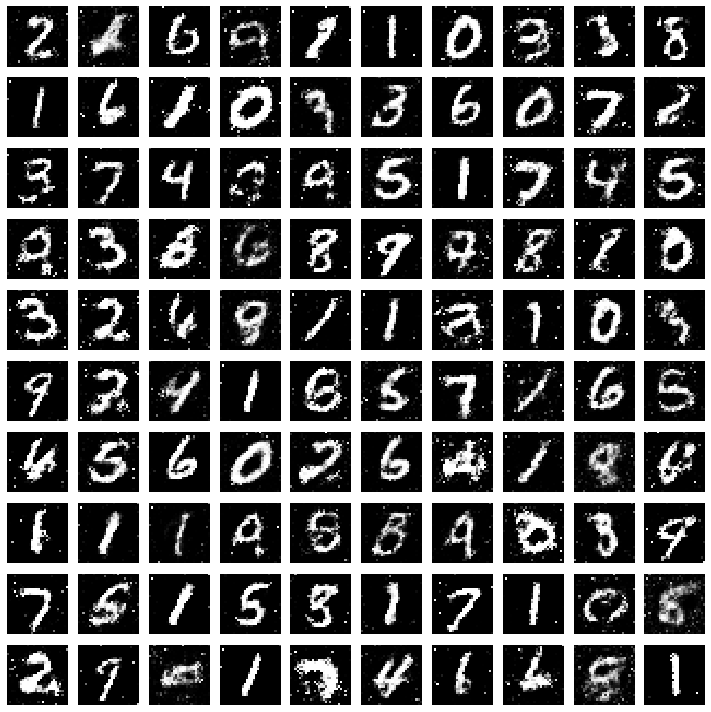

Epoch 31 D loss: 0.6537 G loss: 1.0199
Epoch 32 D loss: 0.6559 G loss: 1.0133
Epoch 33 D loss: 0.6582 G loss: 1.0124
Epoch 34 D loss: 0.6604 G loss: 1.0073
Epoch 35 D loss: 0.6599 G loss: 1.0044


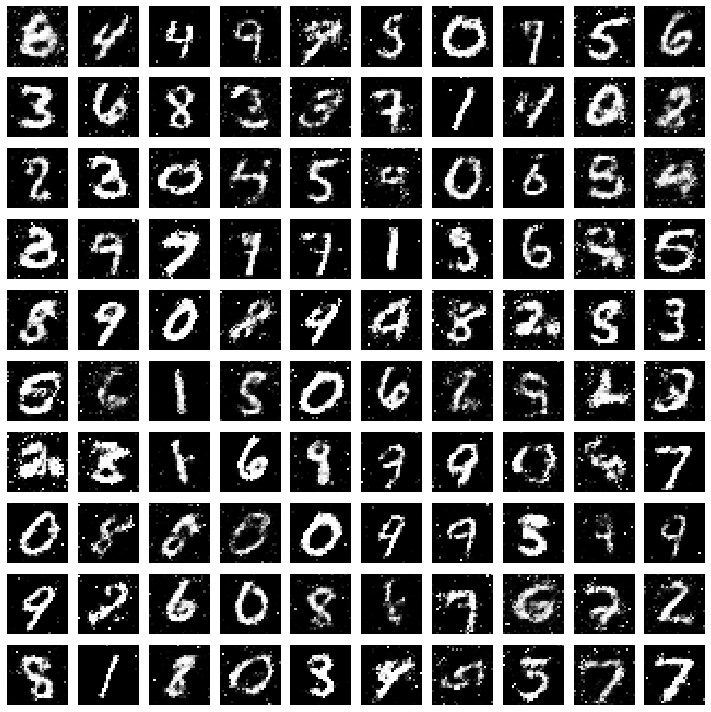

Epoch 36 D loss: 0.6602 G loss: 1.0003
Epoch 37 D loss: 0.6623 G loss: 0.9996
Epoch 38 D loss: 0.6614 G loss: 0.9984
Epoch 39 D loss: 0.6622 G loss: 0.9979
Epoch 40 D loss: 0.6619 G loss: 1.0087


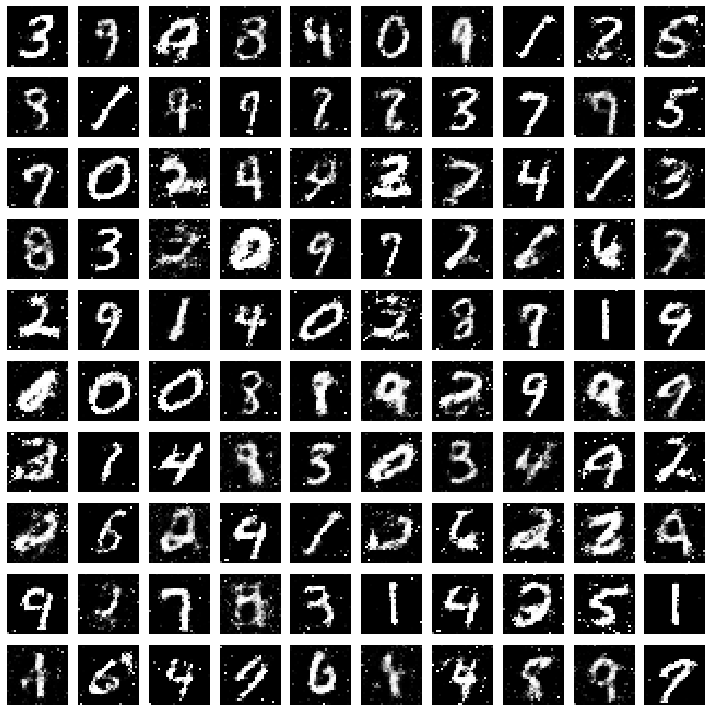

Epoch 41 D loss: 0.6626 G loss: 1.0001
Epoch 42 D loss: 0.6605 G loss: 0.9993
Epoch 43 D loss: 0.6622 G loss: 0.9970
Epoch 44 D loss: 0.6623 G loss: 0.9959
Epoch 45 D loss: 0.6615 G loss: 0.9973


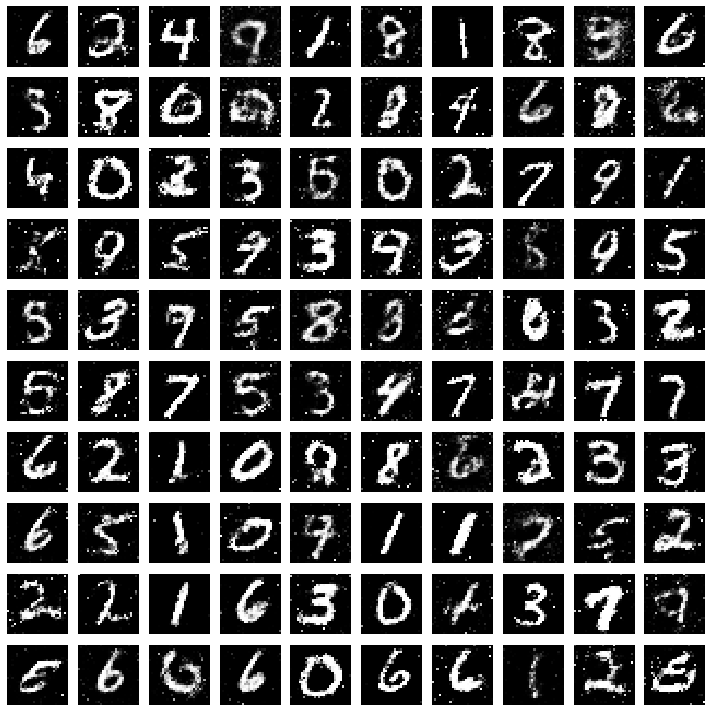

Epoch 46 D loss: 0.6626 G loss: 0.9951
Epoch 47 D loss: 0.6615 G loss: 0.9997
Epoch 48 D loss: 0.6612 G loss: 1.0044
Epoch 49 D loss: 0.6618 G loss: 1.0004
Epoch 50 D loss: 0.6611 G loss: 1.0005


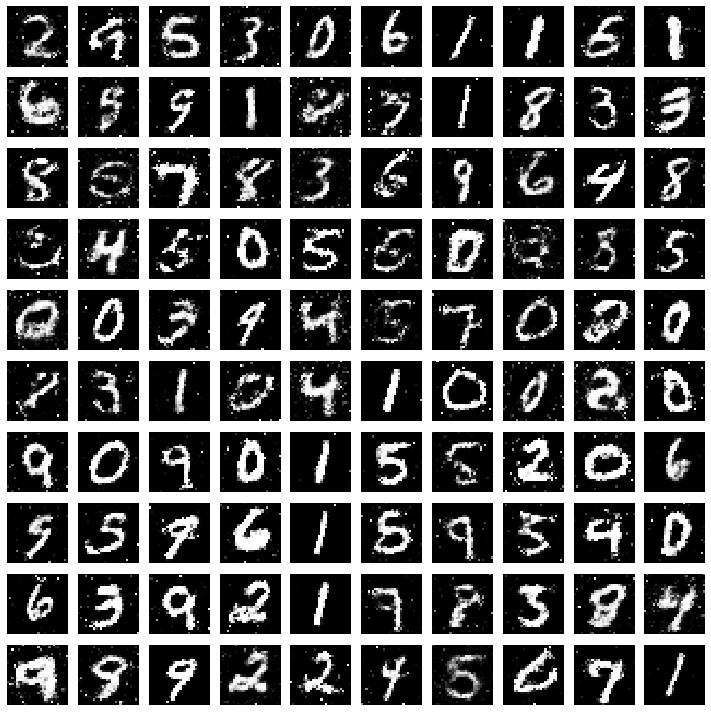

In [ ]:
# @tf.function
d_losses=[]
g_losses=[]
for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    # Mini batch SGD
    for step in range(NO_OF_BATCHES):
      # step-1 discriminator
      # 50% real + 50% fake
      #randomly select 50% real images
      idx = np.random.randint(0,X_train.shape[0],128)
      real_imgs = X_train[idx]
        
      # generate 50% random images
      noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
      fake_imgs = generator.predict(noise) # forward
        
        
      # one sided label smoothing
      real_y = np.ones((HALF_BATCH,1))*0.9 #Label Smoothing, Works well in practice
      fake_y = np.zeros((HALF_BATCH,1))
        
      # train on real and fake images
      d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
      d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
      d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
      epoch_d_loss += d_loss
        
        
      #Train Generator (Complete Model Generator + Frozen Discriminator)
        
      noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
      ground_truth_y = np.ones((BATCH_SIZE,1))
      g_loss = model.train_on_batch(noise,ground_truth_y)
      epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %.4f G loss: %.4f" % ((epoch + 1), epoch_d_loss/NO_OF_BATCHES, epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)

    !mkdir -p models
    
    if(epoch+1)%5==0:
      generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
      save_imgs(epoch)